In [384]:
# importing libraries
import pandas as pd
import numpy as np

In [385]:
# loading dataset
pdr_locations = pd.read_csv(r'C:\Users\Камила\Big_data\charging_stations\dataset\full\pdr_locations.csv')

In [386]:
# look at first 3 rows
pdr_locations.head(3)

,connector_id,connector_station_id,connector_evse_id,connector_connector_status_id,connector_status,connector_uid,station_id,station_uid,station_name,station_address,...,totSessionsNotLocal,totSessionsLocal,totCost,totHouseSessions,totPublicSessions,totPublicCost,totHouseCost,totHouseEnergy,totPublicEnergy,connector_isSuspended
0,462849,385079,IT*F2X*EF2XITA2151*1,1,AVAILABLE,6ea4dcd0-6678-4585-8b8d-41ea3a1cee39,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,198,0,2312.77,0,201,2312.77,0,0,4195.081,NaN
1,462850,385079,IT*F2X*EF2XITA2151*2,1,AVAILABLE,826d0eaa-0de0-4aa4-b65e-5db33380c57a,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,79,0,700.40,0,80,700.40,0,0,1273.441,NaN
2,462851,385079,IT*F2X*EF2XITA2151*3,1,AVAILABLE,bdb4f814-1754-402e-91fc-ab020f180e1a,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,289,0,944.33,0,297,944.33,0,0,2097.308,NaN


### Inspecting dataset

In [387]:
# number of rows, columns
pdr_locations.shape

(830, 144)

In [388]:
# look at the general statistics
pdr_locations.describe()

,connector_id,connector_station_id,connector_connector_status_id,station_id,station_street_number,station_postal_code,station_coordinates_lat,station_coordinates_lon,station_directions,station_time_zone,...,totSessions,totSessionsNotLocal,totSessionsLocal,totCost,totHouseSessions,totPublicSessions,totPublicCost,totHouseCost,totHouseEnergy,totPublicEnergy
count,8.300000e+02,8.300000e+02,830.000000,8.300000e+02,0.0,830.000000,830.000000,830.000000,0.0,0.0,...,830.000000,830.000000,830.000000,830.000000,830.0,830.000000,830.000000,830.0,830.0,830.000000
mean,9.240990e+05,6.863694e+05,1.151807,6.863694e+05,NaN,36763.586747,43.772645,11.679412,NaN,NaN,...,465.036145,454.827711,0.002410,9467.685855,0.0,465.036145,9467.685855,0.0,0.0,14006.847572
std,3.095176e+05,2.529324e+05,0.873737,2.529324e+05,NaN,24449.650843,1.605664,2.172102,NaN,NaN,...,490.645257,480.294118,0.049058,10802.687982,0.0,490.645257,10802.687982,0.0,0.0,15775.476469
min,4.187280e+05,3.691160e+05,1.000000,3.691160e+05,NaN,10.000000,40.837613,8.440903,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
25%,6.250482e+05,4.446590e+05,1.000000,4.446590e+05,NaN,20026.000000,42.200472,9.393760,NaN,NaN,...,79.000000,77.000000,0.000000,584.035000,0.0,79.000000,584.035000,0.0,0.0,1134.687000
50%,9.743725e+05,5.807380e+05,1.000000,5.807380e+05,NaN,33010.000000,44.392512,11.570791,NaN,NaN,...,283.500000,276.500000,0.000000,5360.650000,0.0,283.500000,5360.650000,0.0,0.0,7879.400000
75%,1.167045e+06,9.524130e+05,1.000000,9.524130e+05,NaN,52041.000000,45.074900,13.334975,NaN,NaN,...,729.750000,715.750000,0.000000,15833.222500,0.0,729.750000,15833.222500,0.0,0.0,23273.082000
max,1.413007e+06,1.033694e+06,9.000000,1.033694e+06,NaN,83100.000000,46.499013,16.769807,NaN,NaN,...,3062.000000,2981.000000,1.000000,64974.670000,0.0,3062.000000,64974.670000,0.0,0.0,95445.220000


### Handling missing values

In [389]:
# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)
missing_data

station_owner_company_parent_company_id                 830
station_owner_company_user_id                           830
station_owner_company_deadline                          830
station_owner_company_id_offer                          830
station_owner_company_pin_color                         830
station_owner_company_endpoint                          830
station_owner_company_created_at                        830
station_owner_company_heycharge_email                   830
station_owner_company_heycharge_api_key                 830
station_payment_terminal_sn                             830
station_mid_meter_sn                                    830
station_owner_company_promotion_date                    830
station_owner_company_stars                             830
station_owner_company_vat                               830
station_owner_company_stripe_invoice_extra_fields       830
station_owner_company_stripe_public_key                 830
station_owner_company_stripe_customer_id

In [390]:
# check duplications
pdr_locations.duplicated().sum()

0

we know that there are 830 rows overall in the dataset, and I will drop the columns that have all these rows empty.

In [391]:
# first, i want to count the number of these empty columns
num_empty_columns = len(pdr_locations.columns[pdr_locations.isnull().sum() == len(pdr_locations)])
num_empty_columns

50

In [392]:
# from above i know that there are 50 empty columns, i will drop them. 
columns_to_drop = pdr_locations.columns[pdr_locations.isnull().sum() == len(pdr_locations)]

In [393]:
pdr_locations = pdr_locations.drop(columns=columns_to_drop)
pdr_locations.shape

(830, 94)

In [394]:
# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)
missing_data

connector_isSuspended                                819
station_commissioning_date                           545
station_installation_date                            122
station_serial_number                                 79
station_firmware                                      79
station_model                                         79
station_brand                                         79
station_type_status                                    2
station_owner_company_owner_cost_per_kwh               0
station_owner_company_brand_color                      0
station_owner_company_show_map                         0
station_owner_company_show_roaming                     0
station_owner_company_show_advanced_services           0
station_owner_company_emp_services                     0
station_owner_company_is_dealer                        0
station_owner_company_is_lifestyle                     0
station_owner_company_is_evfleet                       0
station_owner_company_is_subcpo

as there are 830 rows, 50% of them will be 415. so i will drop columns that have more than 50% empty rows.

In [395]:
pdr_locations = pdr_locations.dropna(axis=1, thresh=len(pdr_locations) * 0.5)

In [396]:
pdr_locations.shape

(830, 92)

In [397]:
# displaying more rows of missing data
pd.set_option('display.max_rows', None)

# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)
missing_data

station_installation_date                            122
station_serial_number                                 79
station_firmware                                      79
station_model                                         79
station_brand                                         79
station_type_status                                    2
connector_id                                           0
station_owner_company_is_lifestyle                     0
station_owner_company_show_map                         0
station_owner_company_show_roaming                     0
station_owner_company_show_advanced_services           0
station_owner_company_emp_services                     0
station_owner_company_is_dealer                        0
station_owner_company_is_evfleet                       0
station_owner_company_pre_authorization_amount         0
station_owner_company_is_subcpo                        0
station_owner_company_show_emp_cost                    0
station_owner_company_blacklist

In [398]:
# i'm gonna focus only on missing valued columns
missing_columns = missing_data[missing_data > 0]
missing_columns

station_installation_date    122
station_serial_number         79
station_firmware              79
station_model                 79
station_brand                 79
station_type_status            2
dtype: int64

looking at the columns that have 70 missing rows, i want to check if they are consistent across these 4 columns:

In [399]:
# identifying 4 columns with 79 missing values
columns_with_79_missing = ['station_serial_number', 'station_firmware', 'station_model', 'station_brand']

# check if the missing values are consistent across these columns
missing_in_consistent_rows = pdr_locations[columns_with_79_missing].isnull().all(axis=1)

# filter rows where all 4 columns have missing values
consistent_missing_rows = pdr_locations[missing_in_consistent_rows]
consistent_missing_rows


,connector_id,connector_station_id,connector_evse_id,connector_connector_status_id,connector_status,connector_uid,station_id,station_uid,station_name,station_address,...,totSessions,totSessionsNotLocal,totSessionsLocal,totCost,totHouseSessions,totPublicSessions,totPublicCost,totHouseCost,totHouseEnergy,totPublicEnergy
227,1354231,1014238,IT*F2X*EF2XITN0503*1,1,AVAILABLE,1a7287c9-0f0b-4654-960e-6ec56fb8b643,1014238,04882182-c137-4a85-a111-e4483778830a,Area di Servizio - Pioppa Est,A14 - Autostrada Adriatica,...,286,282,0,6267.37,0,286,6267.37,0,0,9246.347
240,1354243,1014240,IT*F2X*EF2XITN0603*1,1,AVAILABLE,bf44bc3a-391a-4082-b4dd-48e1a777c9e4,1014240,17ade594-87f5-4b32-a310-a0b9c6353810,Area di Servizio - Pioppa Ovest,Autostrada Adriatica,...,6,1,0,112.53,0,6,112.53,0,0,165.051
241,1354244,1014240,IT*F2X*EF2XITN0603*2,1,AVAILABLE,dd6554d9-e656-4a14-8b8a-0290d5037d9e,1014240,17ade594-87f5-4b32-a310-a0b9c6353810,Area di Servizio - Pioppa Ovest,Autostrada Adriatica,...,5,0,0,123.59,0,5,123.59,0,0,181.738
242,1354245,1014241,IT*F2X*EF2XITN0604*1,1,AVAILABLE,b91b72ab-72b0-4f61-927d-273a6b0071f4,1014241,b34b5430-d408-4af0-b7e5-9d4eab33ff7a,Area di Servizio - Pioppa Ovest,Autostrada Adriatica,...,7,1,0,139.91,0,7,139.91,0,0,205.753
243,1354246,1014241,IT*F2X*EF2XITN0604*2,1,AVAILABLE,7af3ec60-6c44-445e-a846-706185ce980f,1014241,b34b5430-d408-4af0-b7e5-9d4eab33ff7a,Area di Servizio - Pioppa Ovest,Autostrada Adriatica,...,10,0,0,229.98,0,10,229.98,0,0,338.233
261,1402425,1030173,IT*F2X*EF2XITA7103*1,1,AVAILABLE,b075e2aa-bbb0-4980-a94d-33a0ef88b8f4,1030173,0da21b1b-7a18-46dc-8be6-3d2f407eab13,Area di Servizio - Badia al Pino Ovest,A1 Autostrada del Sole,...,107,105,0,2632.10,0,107,2632.10,0,0,3869.858
267,1402426,1030173,IT*F2X*EF2XITA7103*2,1,AVAILABLE,7bb797dd-d221-48eb-b666-cef62fb3f53f,1030173,0da21b1b-7a18-46dc-8be6-3d2f407eab13,Area di Servizio - Badia al Pino Ovest,A1 Autostrada del Sole,...,76,76,0,2010.00,0,76,2010.00,0,0,2952.173
318,1352425,1013302,IT*F2X*EF2XITD2104*1,1,AVAILABLE,db6e2d26-454a-4aea-b922-b92c6da44e2a,1013302,7dd1090b-af86-45b2-b1fe-b7d469afb456,Area di Servizio - Brianza Sud,A4 Torino - Trieste,...,55,54,0,2731.46,0,55,2731.46,0,0,4016.808
319,1352426,1013302,IT*F2X*EF2XITD2104*2,1,AVAILABLE,4b7cfdec-1211-4187-9ba8-87c0f2263395,1013302,7dd1090b-af86-45b2-b1fe-b7d469afb456,Area di Servizio - Brianza Sud,A4 Torino - Trieste,...,55,53,0,1205.62,0,55,1205.62,0,0,1765.707
322,1352435,1013309,IT*F2X*EF2XITI1104*1,1,AVAILABLE,c12525b1-1303-42fc-94d9-030eced65f55,1013309,3dadf158-4523-4883-8345-7948aa5501b0,Area di Servizio - Lario Ovest,A9 Autostrada dei laghi,...,218,217,0,4307.00,0,218,4307.00,0,0,6325.409


above i show exactly those 79 rows, but here i'm making sure if it's true.

In [400]:
# identifying the 4 columns with 79 missing values
columns_with_79_missing = ['station_serial_number', 'station_firmware', 'station_model', 'station_brand']

# check if the missing values are consistent across these columns
consistent_missing = pdr_locations[columns_with_79_missing].isnull().all(axis=1).sum() == 79
consistent_missing

True

so, the result is yes, but still i want to see if they directly affect on customer behaviour, that is why i will see their unique values, and if they have too many, i would like to drop them, as it will be hard to analyze.

In [401]:
# check the number of unique values in each column
for column in ['station_brand', 'station_model', 'station_firmware', 'station_serial_number']:
    unique_values = pdr_locations[column].nunique()
    print(f"{column}: {unique_values} unique values")


station_brand: 4 unique values
station_model: 11 unique values
station_firmware: 14 unique values
station_serial_number: 333 unique values


+ thinking logically, it is obvious that *station_brand* could be **important** for the customer, especially if customers prefer certain brands.
+ *station_model* could be important if specific station models offer better features, but it's **less likely** to directly influence customer behavior unless advertised as such;
+ *station_firmware* usually pertains to the software version of the station, which is **unlikely** to directly impact customer decisions, unless customers are aware that firmware impacts performance.
+ *station_serial_number* is the serial number for charging station hardware and **would not directly** affect customer behavior.

That's why I can leave station_brand, and drop other 3 as they either don't significantly influence customer behavior or have too many unique values to be meaningful.

In [402]:
# dropping the columns that i don't need
columns_to_drop = ['station_model', 'station_firmware', 'station_serial_number']

# drop these columns from the dataset
pdr_locations = pdr_locations.drop(columns=columns_to_drop)
pdr_locations.head()


,connector_id,connector_station_id,connector_evse_id,connector_connector_status_id,connector_status,connector_uid,station_id,station_uid,station_name,station_address,...,totSessions,totSessionsNotLocal,totSessionsLocal,totCost,totHouseSessions,totPublicSessions,totPublicCost,totHouseCost,totHouseEnergy,totPublicEnergy
0,462849,385079,IT*F2X*EF2XITA2151*1,1,AVAILABLE,6ea4dcd0-6678-4585-8b8d-41ea3a1cee39,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,201,198,0,2312.77,0,201,2312.77,0,0,4195.081
1,462850,385079,IT*F2X*EF2XITA2151*2,1,AVAILABLE,826d0eaa-0de0-4aa4-b65e-5db33380c57a,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,80,79,0,700.40,0,80,700.40,0,0,1273.441
2,462851,385079,IT*F2X*EF2XITA2151*3,1,AVAILABLE,bdb4f814-1754-402e-91fc-ab020f180e1a,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,297,289,0,944.33,0,297,944.33,0,0,2097.308
3,966351,578546,IT*F2X*EF2XITN3001*1,1,AVAILABLE,bdf9db5b-92be-4007-b729-0dcc1d73196e,578546,addf1a35-1966-494a-8eea-8d9448eb8013,Area di Servizio - Rubicone Est,A14 - Autostrada Adriatica,...,1220,1199,0,27640.46,0,1220,27640.46,0,0,40645.668
4,966352,578546,IT*F2X*EF2XITN3001*2,1,AVAILABLE,f03b3c38-b0ca-4aed-8f9d-f03c133f7e19,578546,addf1a35-1966-494a-8eea-8d9448eb8013,Area di Servizio - Rubicone Est,A14 - Autostrada Adriatica,...,1096,1072,0,25102.30,0,1096,25102.30,0,0,36914.252


In [403]:
# displaying more rows of missing data
pd.set_option('display.max_rows', None)

# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)

# i'm gonna focus only on missing valued columns
missing_columns = missing_data[missing_data > 0]
missing_columns

station_installation_date    122
station_brand                 79
station_type_status            2
dtype: int64

now i want to see what kind of unique values does station_brand have:

In [404]:
# display the unique values of the 'station_brand' column
unique_brands = pdr_locations['station_brand'].unique()
unique_brands

array(['EVTEC', 'alpitronic GmbH', nan, 'FIMER SPA', 'Wall Box Chargers'],
      dtype=object)

In [405]:
# replace nan values in 'station_brand' with 'Unknown'
pdr_locations['station_brand'].fillna('Unknown', inplace=True)

# verify the replacement by checking the unique values again
unique_brands_after_replacement = pdr_locations['station_brand'].unique()
print(unique_brands_after_replacement)


['EVTEC' 'alpitronic GmbH' 'Unknown' 'FIMER SPA' 'Wall Box Chargers']


In [406]:
# display the unique values of the 'station_type_status' column
unique_brands = pdr_locations['station_type_status'].unique()
unique_brands

array(['public', 'to_be_installed', nan], dtype=object)

there are 2 rows that have empty station status, and i cannot fill them with either 'public' or 'to be installed', that's why i decided to drop them, it will not significantly affect the results.

In [407]:
# Drop rows where 'station_type_status' is NaN
pdr_locations.dropna(subset=['station_type_status'], inplace=True)

however, about station_installation_date I am not sure, there are 122 missing values, maybe we will need this information further, so i just want to fill it for now with '0000-00-00T00:00:00.000000Z'

In [408]:
# replace NaN values in 'station_installation_date' with the placeholder date
pdr_locations['station_installation_date'].fillna('0000-00-00T00:00:00.000000Z', inplace=True)

# verify the replacement by checking unique values in 'station_installation_date'
unique_installation_dates = pdr_locations['station_installation_date'].unique()

In [409]:
# displaying more rows of missing data
pd.set_option('display.max_rows', None)

# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)

# i'm gonna focus only on missing valued columns
missing_columns = missing_data[missing_data > 0]
missing_columns

Series([], dtype: int64)

In [410]:
pdr_locations.shape

(828, 89)

now, i want to see other columns' unique values, because if there is only one unique value, i don't think it's a good idea to leave this column in dataset. especially, if it's connected like with Italy, because we all work on the dataset of one country, and we want our dataset to have more meaningful data.

In [411]:
# calculate the number of unique values in each column
unique_values_count = pdr_locations.nunique()

# convert to a DataFrame for better visualization
unique_values_df = pd.DataFrame(unique_values_count, columns=['Number of Unique Values'])
unique_values_df


,Number of Unique Values
connector_id,828
connector_station_id,370
connector_evse_id,828
connector_connector_status_id,4
connector_status,4
connector_uid,828
station_id,370
station_uid,370
station_name,112
station_address,38


we see there are a lot of columns that have only one unique value, now i will show what are they:

In [412]:
# filter columns that have only 1 unique value
single_value_columns = pdr_locations.nunique()[pdr_locations.nunique() == 1].index

# create a dataFrame to show the column name, number of unique values, and the value itself
single_value_df = pd.DataFrame({
    'Column Name': single_value_columns,
    'Number of Unique Values': [1] * len(single_value_columns),
    'Value': [pdr_locations[col].unique()[0] for col in single_value_columns]
}).reset_index(drop=True)

print(single_value_df.to_string(index=False))

                                      Column Name  Number of Unique Values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Value
                               station_country_id                        1                                                                                                                                                                                                                                                                                                                                                                          

I'm gonna justify why drop all the columns:
+ station_country_id = IT, which is the abbreviation for Italy, our project is about Italian stations, so anyways it is obvious for everyone it's Italian, there are no more other countries.

same reason as above:
+ station_country = Italy
+ station_type_name = PARKING_LOT
+ station_station_type_id = 4, as we have only one station type, it also doesn't make sense.
+ station_is_offline, station_is_at_home, station_is_qr_private_enable = False
+ station_owner_company_id, station_owner_company_uid, station_owner_company_name, station_owner_company_eMI3_id, station_owner_company_imported = everything about Free To X company
+ station_owner_company_description_en, station_owner_company_description_it, station_owner_company_description_de, tation_owner_company_description_fr = translations about company description, we don't need this info.
+ station_owner_company_street, station_owner_company_street_number, station_owner_company_zip, station_owner_company_city, station_owner_company_district, station_owner_company_state, station_owner_company_country = all about the street info of company
+ station_owner_company_country, station_owner_company_primary_category_id = type of company and its services.
+ all others you can see above.

In [413]:
# Drop the columns that have only one unique value from the CSV DataFrame
pdr_locations = pdr_locations.drop(columns=single_value_columns)

# Display the remaining columns in the cleaned DataFrame
pdr_locations.columns

Index(['connector_id', 'connector_station_id', 'connector_evse_id',
       'connector_connector_status_id', 'connector_status', 'connector_uid',
       'station_id', 'station_uid', 'station_name', 'station_address',
       'station_postal_code', 'station_city', 'station_coordinates_lat',
       'station_coordinates_lon', 'station_brand', 'station_type_status',
       'station_installation_date', 'station_is_visible', 'plugs', 'sessions',
       'totEnergy', 'totEnergyLocal', 'totEnergyNotLocal', 'totSessions',
       'totSessionsNotLocal', 'totSessionsLocal', 'totCost',
       'totPublicSessions', 'totPublicCost', 'totPublicEnergy'],
      dtype='object')

In [414]:
pdr_locations.shape

(828, 30)

In [415]:
pdr_locations.head(3)

,connector_id,connector_station_id,connector_evse_id,connector_connector_status_id,connector_status,connector_uid,station_id,station_uid,station_name,station_address,...,totEnergy,totEnergyLocal,totEnergyNotLocal,totSessions,totSessionsNotLocal,totSessionsLocal,totCost,totPublicSessions,totPublicCost,totPublicEnergy
0,462849,385079,IT*F2X*EF2XITA2151*1,1,AVAILABLE,6ea4dcd0-6678-4585-8b8d-41ea3a1cee39,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,4195.081,0.0,4064.325,201,198,0,2312.77,201,2312.77,4195.081
1,462850,385079,IT*F2X*EF2XITA2151*2,1,AVAILABLE,826d0eaa-0de0-4aa4-b65e-5db33380c57a,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,1273.441,0.0,1256.926,80,79,0,700.40,80,700.40,1273.441
2,462851,385079,IT*F2X*EF2XITA2151*3,1,AVAILABLE,bdb4f814-1754-402e-91fc-ab020f180e1a,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,...,2097.308,0.0,2064.748,297,289,0,944.33,297,944.33,2097.308


Columns that are unlikely to affect customer behavior:
+ connector_station_id, station_id, station_uid: These are identifiers for internal tracking and are not visible to customers.
+ connector_connector_status_id, station_is_visible: These are more internal flags and statuses that do not directly impact customer behavior.
+ totEnergyLocal, totEnergyNotLocal, totSessions, totSessionsNotLocal, totSessionsLocal, totCost, totPublicCost: These are aggregate metrics for operational analysis and are not directly relevant to individual customer experiences.

So, I will **KEEP** columns: related to location, brand, availability, service type, and usage metrics and **DROP** columns that are identifiers, internal flags, or operational metrics that are not customer-facing.

In [416]:
# defining columns to drop based on the analysis
columns_to_drop = [
    'connector_station_id', 'station_id', 'station_uid', 
    'connector_connector_status_id', 'station_is_visible', 
    'totEnergyLocal', 'totEnergyNotLocal', 
    'totSessions', 'totSessionsNotLocal', 'totSessionsLocal', 
    'totCost', 'totPublicCost'
]

# drop the columns
pdr_locations_cleaned  = pdr_locations.drop(columns=columns_to_drop)
pdr_locations_cleaned .columns

Index(['connector_id', 'connector_evse_id', 'connector_status',
       'connector_uid', 'station_name', 'station_address',
       'station_postal_code', 'station_city', 'station_coordinates_lat',
       'station_coordinates_lon', 'station_brand', 'station_type_status',
       'station_installation_date', 'plugs', 'sessions', 'totEnergy',
       'totPublicSessions', 'totPublicEnergy'],
      dtype='object')

In [417]:
pdr_locations_cleaned.shape

(828, 18)

In [418]:
pdr_locations_cleaned.describe()

,connector_id,station_postal_code,station_coordinates_lat,station_coordinates_lon,totEnergy,totPublicSessions,totPublicEnergy
count,8.280000e+02,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,9.229180e+05,36840.274155,43.774811,11.678591,14036.126950,466.041063,14036.126950
std,3.089553e+05,24429.235550,1.606998,2.174663,15783.256892,490.810903,15783.256892
min,4.187280e+05,10.000000,40.837613,8.440903,0.000000,0.000000,0.000000
25%,6.250478e+05,20026.000000,42.200441,9.393757,1127.410500,79.750000,1127.410500
50%,9.743665e+05,36510.000000,44.392512,11.570786,7887.934500,284.500000,7887.934500
75%,1.167043e+06,52041.000000,45.091749,13.334975,23308.863000,731.500000,23308.863000
max,1.413002e+06,83100.000000,46.499013,16.769807,95445.220000,3062.000000,95445.220000


In [419]:
# displaying the column names, their data types, and the number of unique values
column_info_df = pd.DataFrame({
    'Column Name': pdr_locations_cleaned.columns,
    'Data Type': pdr_locations_cleaned.dtypes.values,
    'Number of Unique Values': pdr_locations_cleaned.nunique().values
})

print(column_info_df)

                  Column Name Data Type  Number of Unique Values
0                connector_id     int64                      828
1           connector_evse_id    object                      828
2            connector_status    object                        4
3               connector_uid    object                      828
4                station_name    object                      112
5             station_address    object                       38
6         station_postal_code     int64                       68
7                station_city    object                       67
8     station_coordinates_lat   float64                      347
9     station_coordinates_lon   float64                      350
10              station_brand    object                        5
11        station_type_status    object                        2
12  station_installation_date    object                      120
13                      plugs    object                       11
14                   sess

rechecking some columns i'm not sure on that they have categorical values, they have array - dictionary like format:

In [420]:
pdr_locations_cleaned['sessions'].unique()

array(["[{'count': 19, 'energy': 323.54699999999997, 'date': '2024-01', 'cost': '177.93', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 14, 'energy': 325.219, 'date': '2024-02', 'cost': '178.87', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 14, 'energy': 287.817, 'date': '2024-03', 'cost': '158.31', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 25, 'energy': 543.858, 'date': '2024-04', 'cost': '299.07', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 27, 'energy': 497.32099999999997, 'date': '2024-05', 'cost': '273.53', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 32, 'energy': 593.2

In [421]:
pdr_locations_cleaned['plugs'].unique()

array(["[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 1, 'plug_format_id': 2, 'type': 'CHADEMO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 22000, 'max_voltage': 230, 'power_type_id': 2, 'plug_type_id': 20, 'plug_format_id': 1, 'type': 'TYPE 2', 'format': 'SOCKET'}]",
       "[{'max_electric_power': 300000, 'max_voltage': 600, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 50000, 'max_voltage': 1000, 'power_type_id': 3, 'plug_type_id': 1, 'plug_format_id': 2, 'type': 'CHADEMO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 400000, 'max_voltage': 800, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 150000,

I'm not sure what can i do with these 2 columns, but for now i will just label encode them.

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns

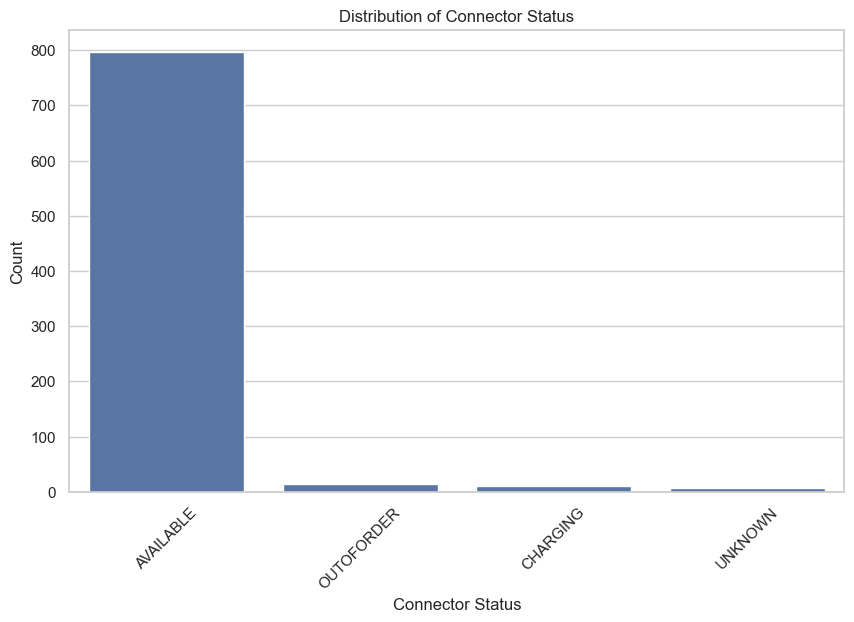

In [423]:
# plot the distribution of connector status
plt.figure(figsize=(10, 6))
sns.countplot(x='connector_status', data=pdr_locations_cleaned)
plt.title('Distribution of Connector Status')
plt.xlabel('Connector Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

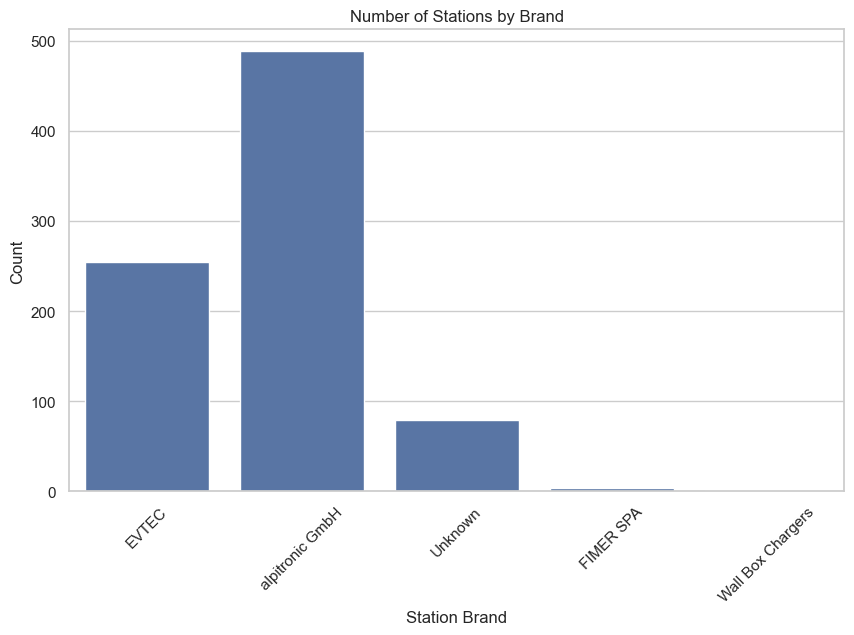

In [424]:
# bar plot of the number of stations by brand
plt.figure(figsize=(10, 6))
sns.countplot(x='station_brand', data=pdr_locations_cleaned)
plt.title('Number of Stations by Brand')
plt.xlabel('Station Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


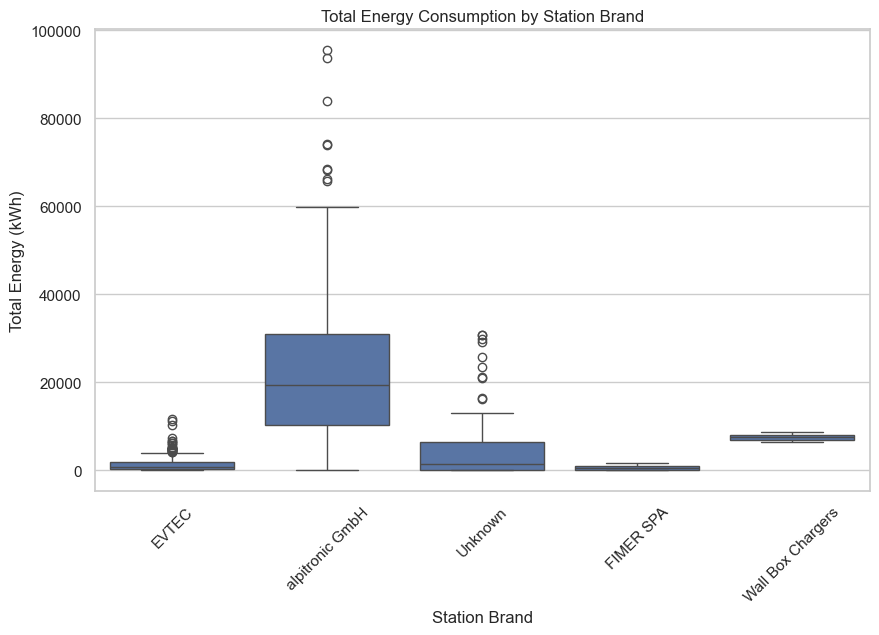

In [425]:
# Box plot of total energy consumption by station brand
plt.figure(figsize=(10, 6))
sns.boxplot(x='station_brand', y='totEnergy', data=pdr_locations_cleaned)
plt.title('Total Energy Consumption by Station Brand')
plt.xlabel('Station Brand')
plt.ylabel('Total Energy (kWh)')
plt.xticks(rotation=45)
plt.show()

### Label Encoding

In [426]:
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
le = LabelEncoder()

# list of columns that need label encoding (categorical columns)
columns_to_encode = ['connector_evse_id', 'connector_status', 'connector_uid', 
                     'station_name', 'station_address', 'station_city', 
                     'station_brand', 'station_type_status', 
                     'plugs', 'sessions']

# apply label encoding to the necessary columns
for col in columns_to_encode:
    pdr_locations_cleaned[col] = le.fit_transform(pdr_locations_cleaned[col].astype(str))

# display the first few rows to verify the encoding
print(pdr_locations_cleaned.head())

   connector_id  connector_evse_id  connector_status  connector_uid  \
0        462849                 53                 0            349   
1        462850                 54                 0            411   
2        462851                 55                 0            607   
3        966351                572                 0            609   
4        966352                573                 0            789   

   station_name  station_address  station_postal_code  station_city  \
0             9                2                29017            29   
1             9                2                29017            29   
2             9                2                29017            29   
3            74                9                47039            56   
4            74                9                47039            56   

   station_coordinates_lat  station_coordinates_lon  station_brand  \
0                44.962660                 9.904260              0   
1     

creating new features : year, month, week:

In [427]:
# convert the 'station_installation_date' column to datetime format
pdr_locations_cleaned['station_installation_date'] = pd.to_datetime(pdr_locations_cleaned['station_installation_date'], errors='coerce')

# create new columns for year, month, and week
pdr_locations_cleaned['installation_year'] = pdr_locations_cleaned['station_installation_date'].dt.year
pdr_locations_cleaned['installation_month'] = pdr_locations_cleaned['station_installation_date'].dt.month
pdr_locations_cleaned['installation_week'] = pdr_locations_cleaned['station_installation_date'].dt.isocalendar().week

In [428]:
# convert year, month, and week columns to integer, filling NaN values with 0 (or another appropriate value)
pdr_locations_cleaned['installation_year'] = pdr_locations_cleaned['installation_year'].fillna(0).astype(int)
pdr_locations_cleaned['installation_month'] = pdr_locations_cleaned['installation_month'].fillna(0).astype(int)
pdr_locations_cleaned['installation_week'] = pdr_locations_cleaned['installation_week'].fillna(0).astype(int)

# display the first few rows to verify the changes
pdr_locations_cleaned[['station_installation_date', 'installation_year', 'installation_month', 'installation_week']].head()

,station_installation_date,installation_year,installation_month,installation_week
0,2022-04-22 00:00:00+00:00,2022,4,16
1,2022-04-22 00:00:00+00:00,2022,4,16
2,2022-04-22 00:00:00+00:00,2022,4,16
3,2023-03-30 00:00:00+00:00,2023,3,13
4,2023-03-30 00:00:00+00:00,2023,3,13


In [429]:
pdr_locations_cleaned.columns

Index(['connector_id', 'connector_evse_id', 'connector_status',
       'connector_uid', 'station_name', 'station_address',
       'station_postal_code', 'station_city', 'station_coordinates_lat',
       'station_coordinates_lon', 'station_brand', 'station_type_status',
       'station_installation_date', 'plugs', 'sessions', 'totEnergy',
       'totPublicSessions', 'totPublicEnergy', 'installation_year',
       'installation_month', 'installation_week'],
      dtype='object')

In [430]:
pdr_locations_cleaned.head(2)

,connector_id,connector_evse_id,connector_status,connector_uid,station_name,station_address,station_postal_code,station_city,station_coordinates_lat,station_coordinates_lon,...,station_type_status,station_installation_date,plugs,sessions,totEnergy,totPublicSessions,totPublicEnergy,installation_year,installation_month,installation_week
0,462849,53,0,349,9,2,29017,29,44.96266,9.90426,...,0,2022-04-22 00:00:00+00:00,10,262,4195.081,201,4195.081,2022,4,16
1,462850,54,0,411,9,2,29017,29,44.96266,9.90426,...,0,2022-04-22 00:00:00+00:00,9,188,1273.441,80,1273.441,2022,4,16


### Visualization part

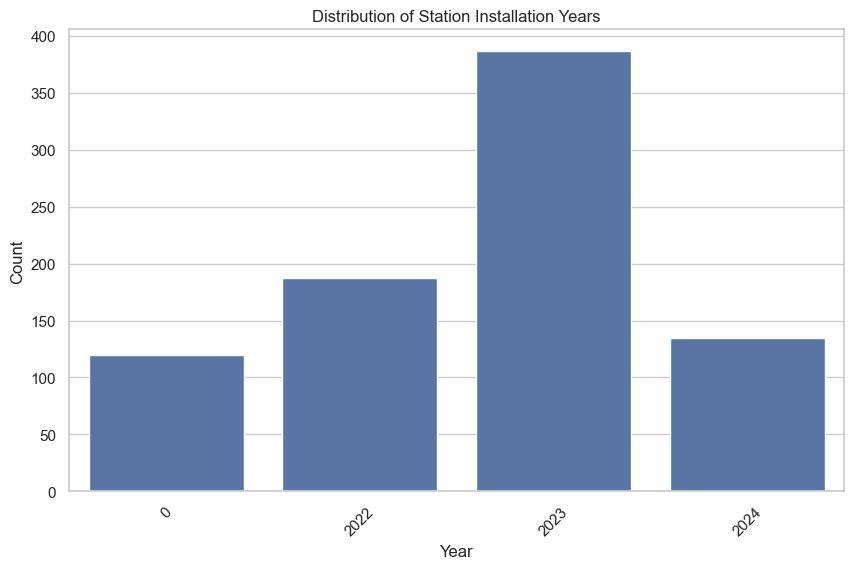

In [431]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the plot style
sns.set(style="whitegrid")

# plot the distribution of installation years
plt.figure(figsize=(10, 6))
sns.countplot(x='installation_year', data=pdr_locations_cleaned)
plt.title('Distribution of Station Installation Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

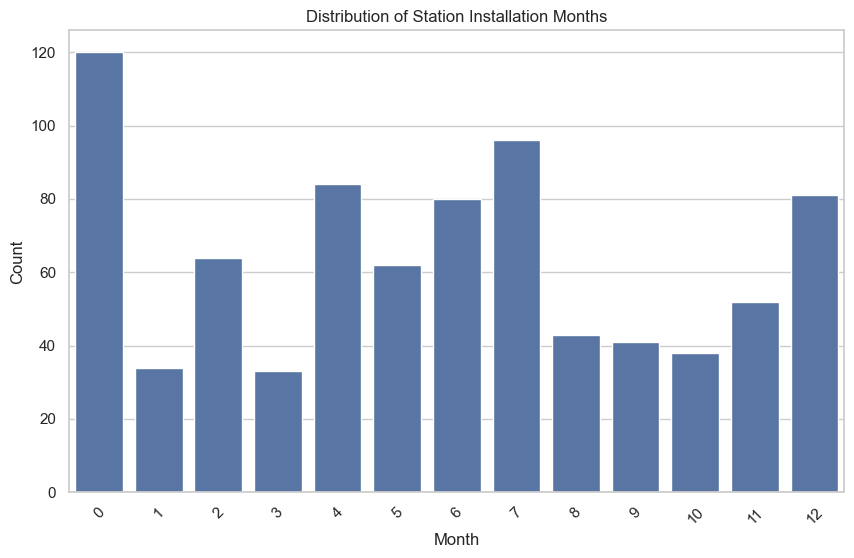

In [432]:
# plot the distribution of installation months
plt.figure(figsize=(10, 6))
sns.countplot(x='installation_month', data=pdr_locations_cleaned)
plt.title('Distribution of Station Installation Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Камила\AppData\Local\Temp\ipykernel_21008\2881232552.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pdr_locations_cleaned.corr()


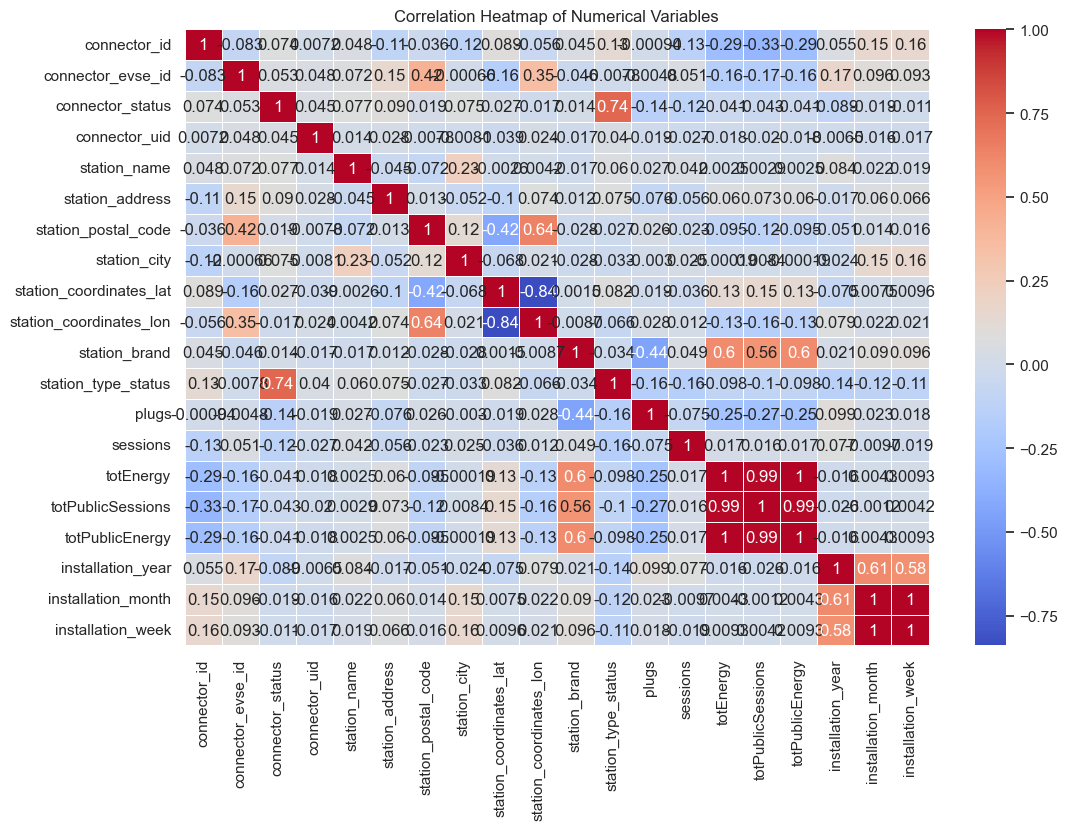

In [433]:
# compute the correlation matrix
correlation_matrix = pdr_locations_cleaned.corr()

# generate a heatmap to visualize the correlation between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

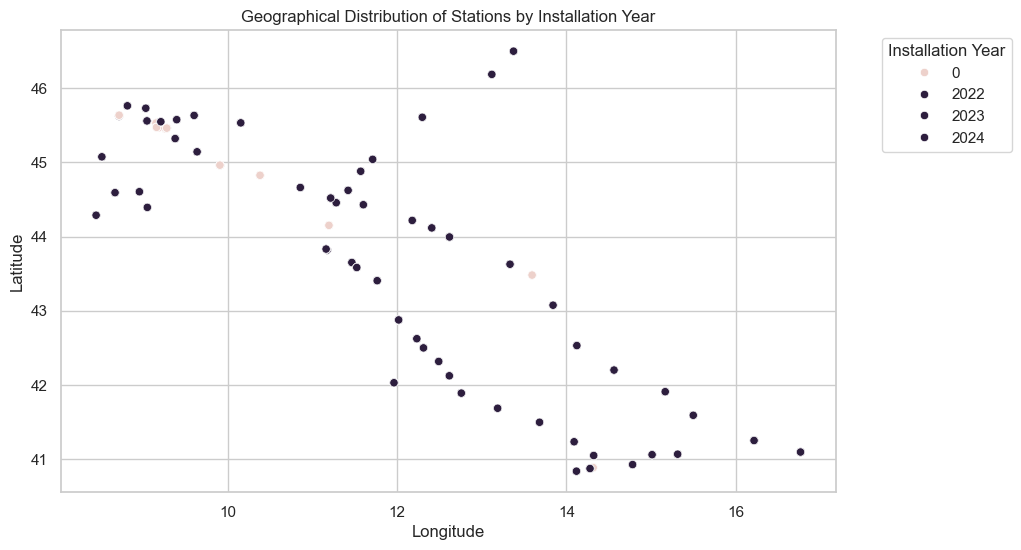

In [434]:
# scatter plot of station locations based on latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='station_coordinates_lon', y='station_coordinates_lat', data=pdr_locations_cleaned, hue='installation_year')
plt.title('Geographical Distribution of Stations by Installation Year')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Installation Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


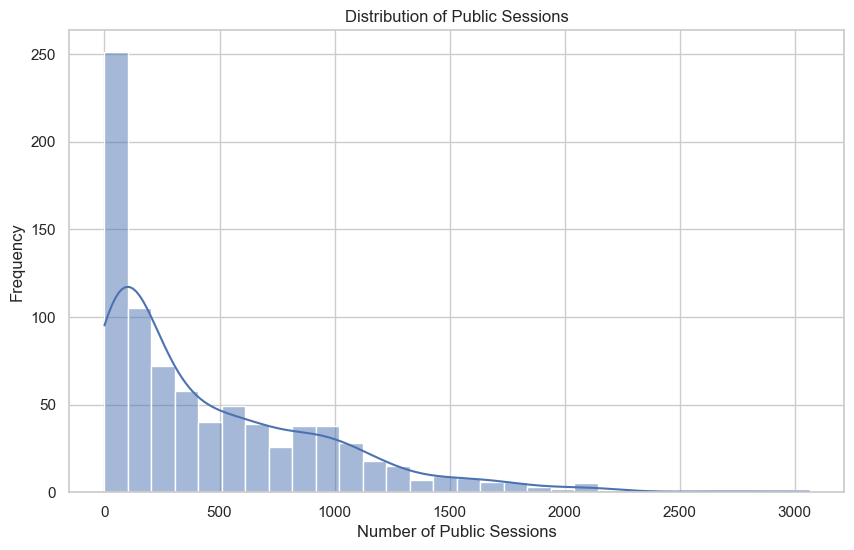

In [435]:
# Plot distribution of public sessions
plt.figure(figsize=(10, 6))
sns.histplot(pdr_locations_cleaned['totPublicSessions'], bins=30, kde=True)
plt.title('Distribution of Public Sessions')
plt.xlabel('Number of Public Sessions')
plt.ylabel('Frequency')
plt.show()

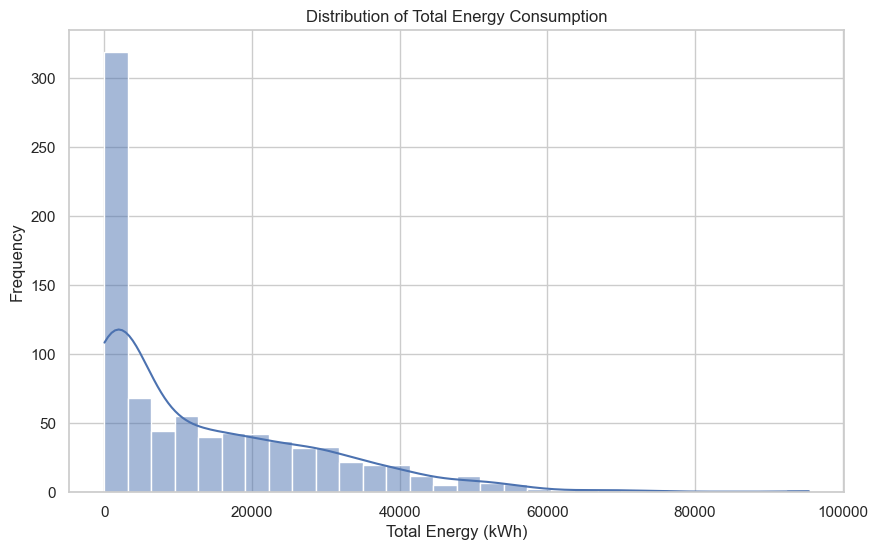

In [436]:
# Plot distribution of total energy consumption
plt.figure(figsize=(10, 6))
sns.histplot(pdr_locations_cleaned['totEnergy'], bins=30, kde=True)
plt.title('Distribution of Total Energy Consumption')
plt.xlabel('Total Energy (kWh)')
plt.ylabel('Frequency')
plt.show()

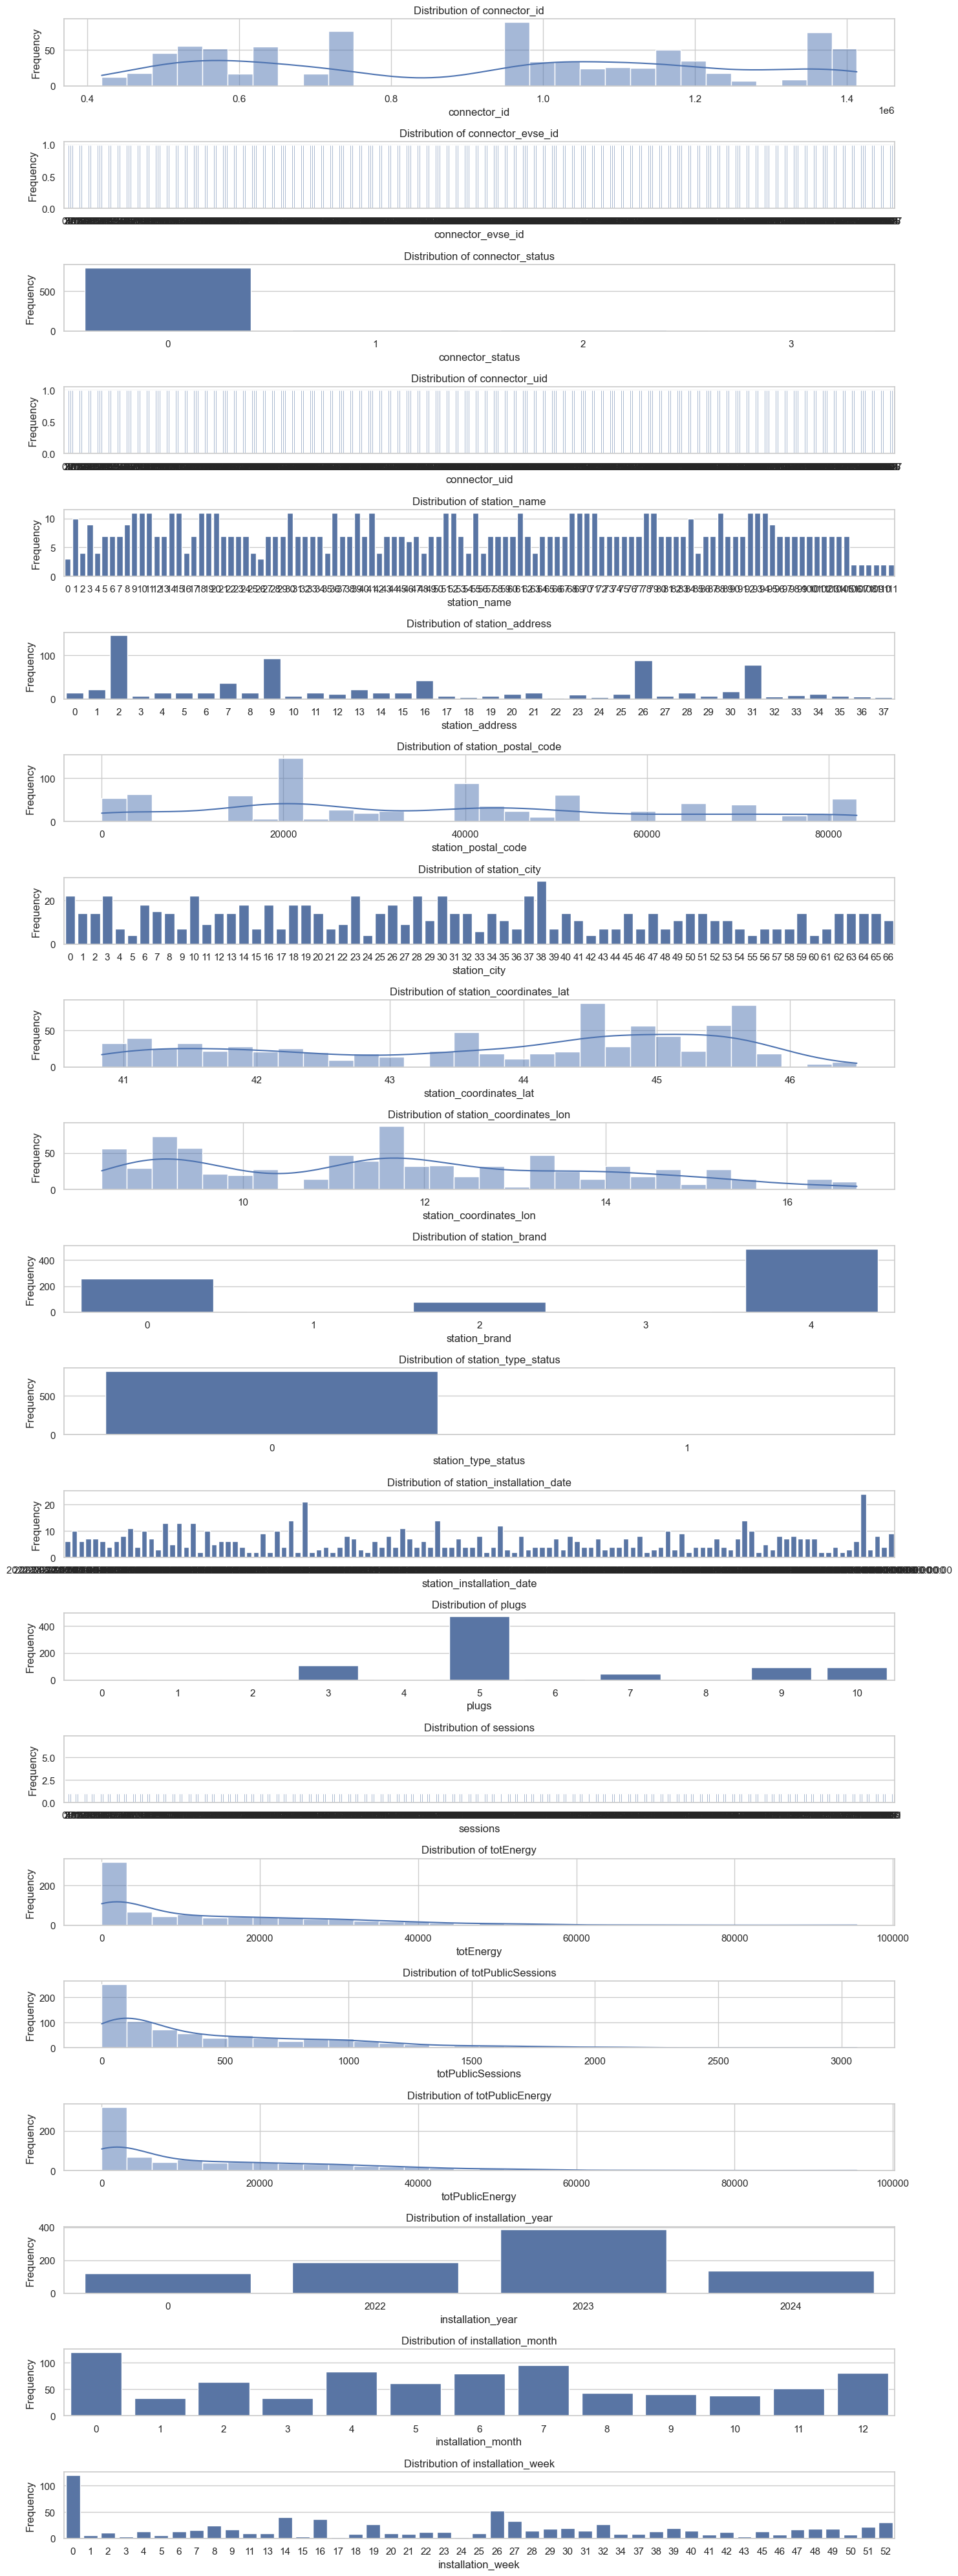

In [437]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all columns in the DataFrame
all_columns = pdr_locations_cleaned.columns

# Set up the plotting space with appropriate size
plt.figure(figsize=(15, 40))

# Loop through each column and plot the distribution
for i, col in enumerate(all_columns, 1):
    plt.subplot(len(all_columns), 1, i)
    if pdr_locations_cleaned[col].dtype in ['int64', 'float64']:  # Numeric columns
        sns.histplot(pdr_locations_cleaned[col], bins=30, kde=True)
    else:  # Categorical columns
        sns.countplot(x=col, data=pdr_locations_cleaned)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


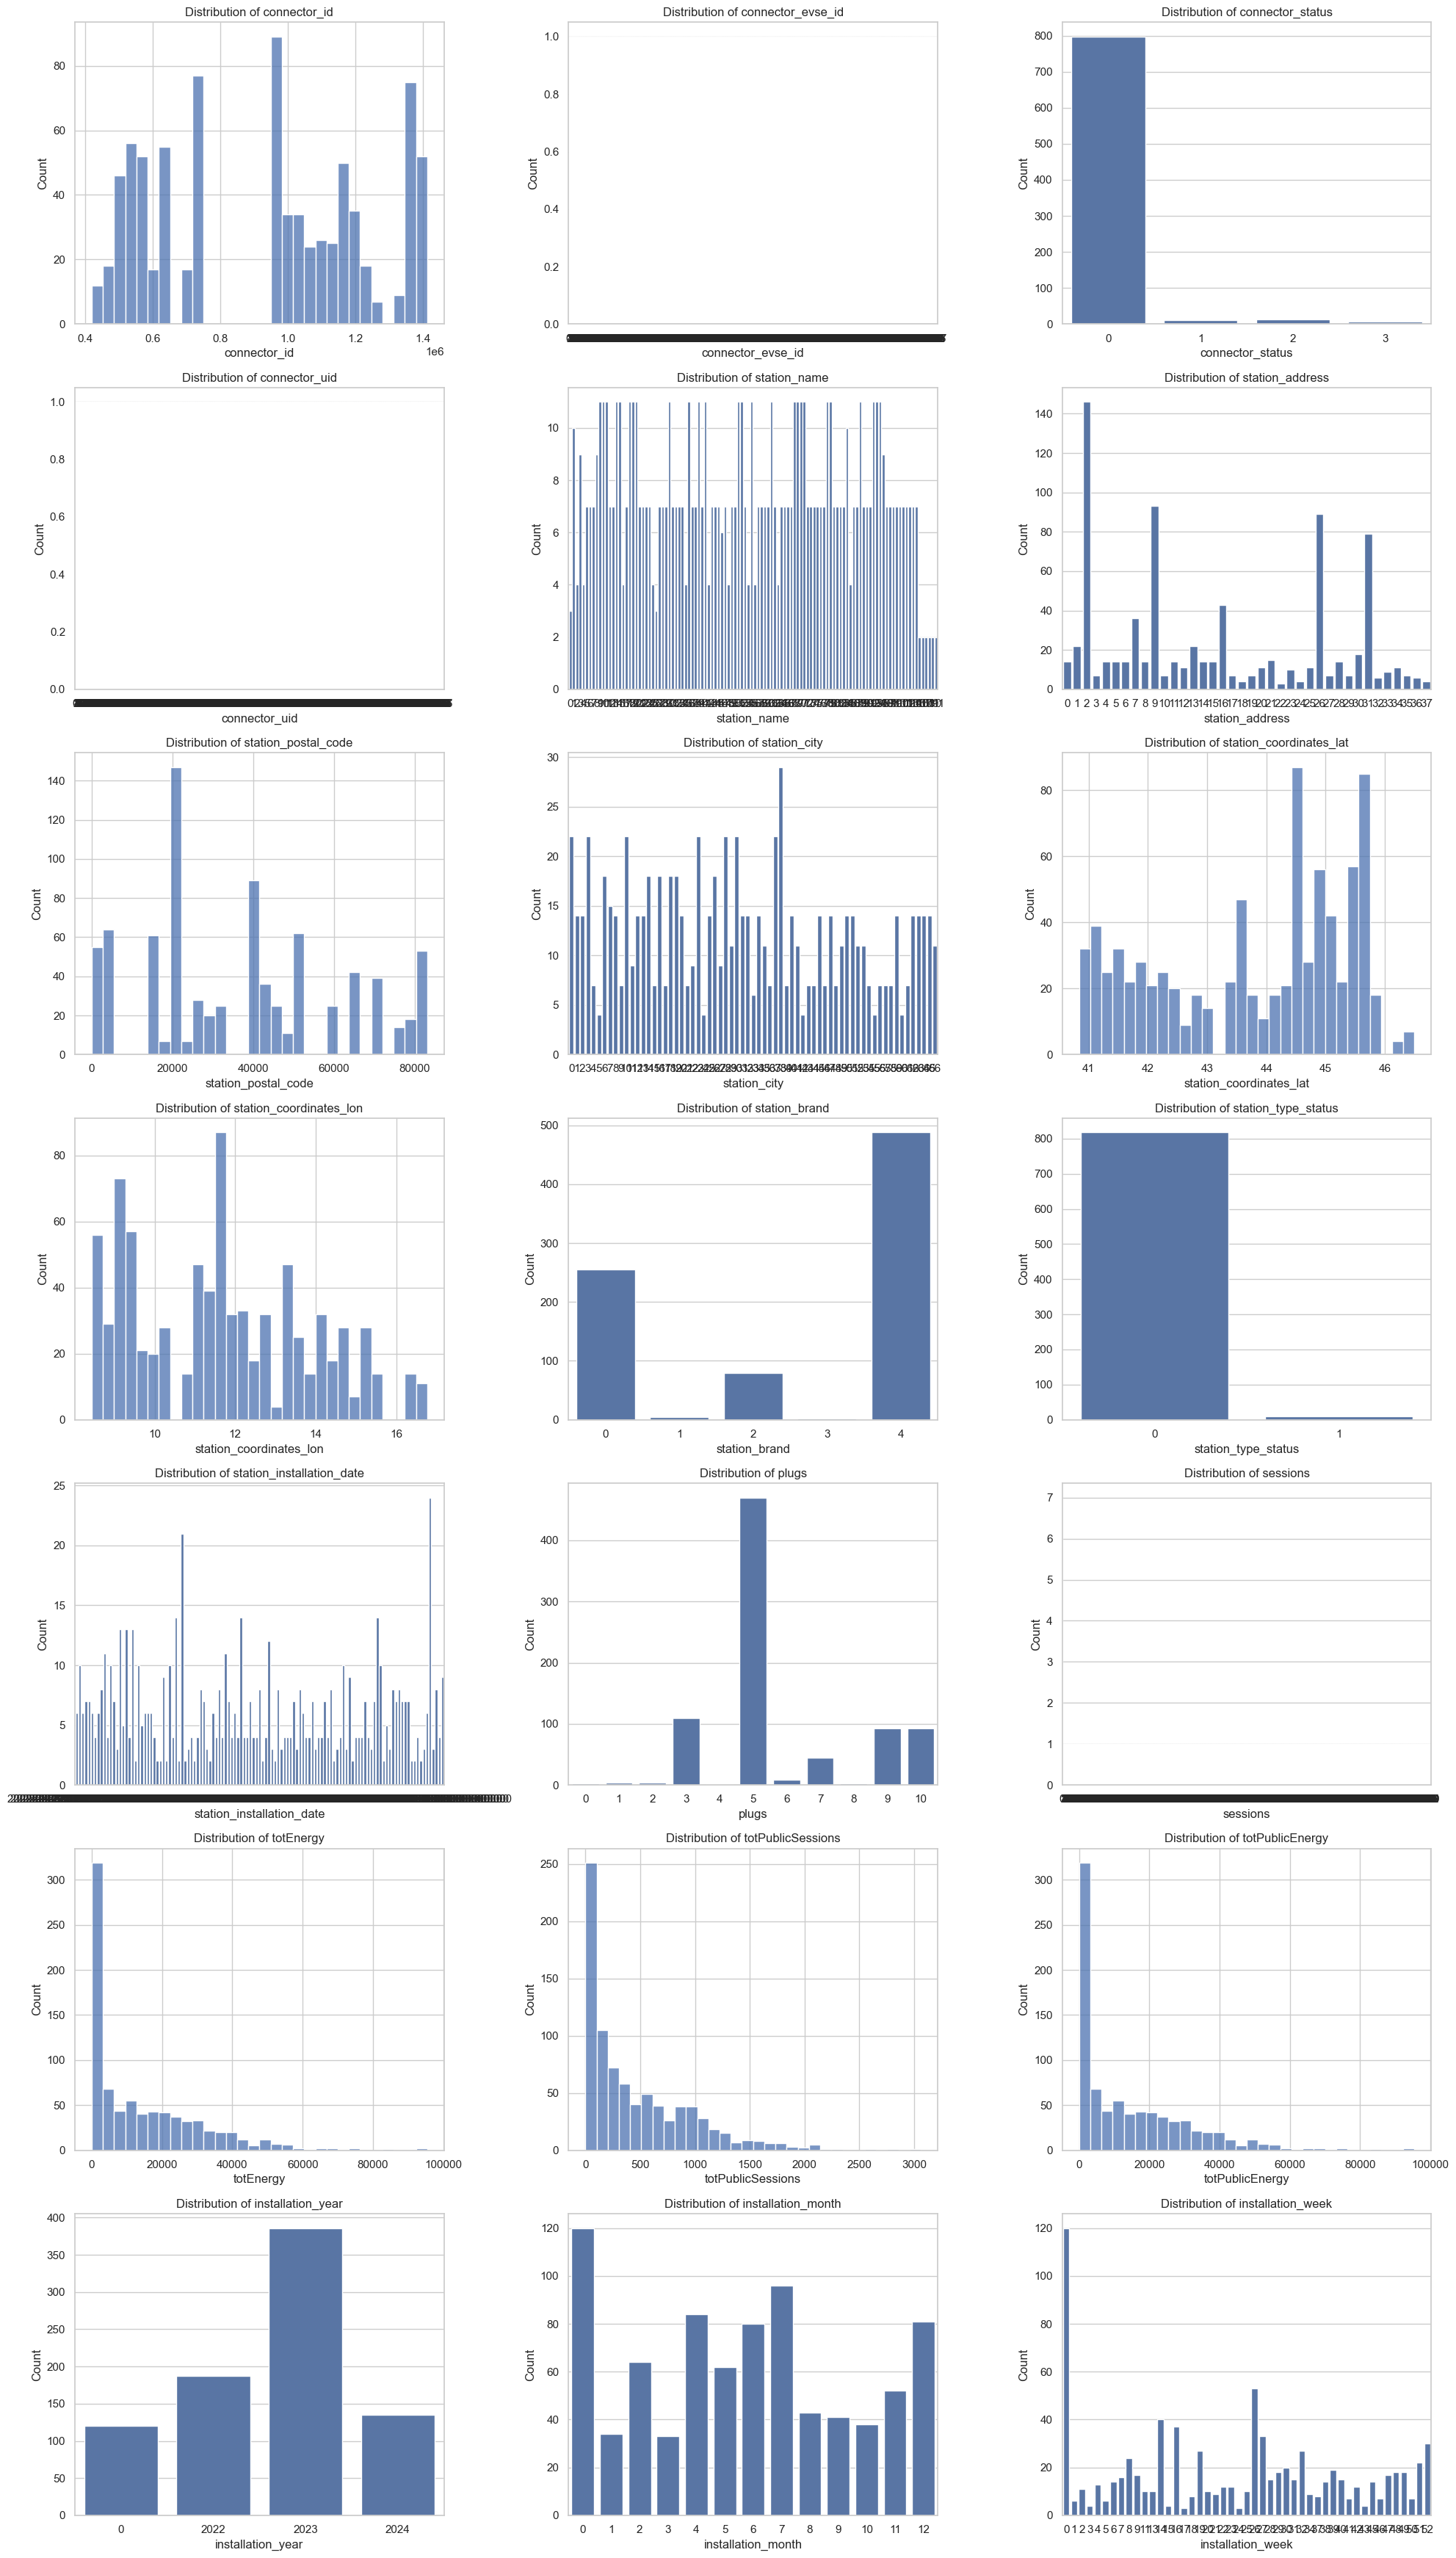

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all columns in the DataFrame
all_columns = pdr_locations_cleaned.columns

# Number of columns to display in each row
columns_per_row = 3
num_rows = math.ceil(len(all_columns) / columns_per_row)

# Set up the plotting space with appropriate size
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and plot the distribution
for i, col in enumerate(all_columns):
    if pdr_locations_cleaned[col].dtype in ['int64', 'float64']:  # Numeric columns
        sns.histplot(pdr_locations_cleaned[col], bins=30, kde=False, ax=axes[i])
    else:  # Categorical columns
        sns.countplot(x=col, data=pdr_locations_cleaned, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()
